In [1]:
#Librerias basicas
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import IterableDataset
#from PIL import Image, ImageDraw
#import pandas as pd
#import os
import cv2
#import random
#import math
import torch.nn as nn
#import time
from functools import partial
from dataclasses import dataclass
from collections import OrderedDict



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Transformar los datos para convertirlos a tensores de PyTorch y normalizarlos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# Descargar y cargar el conjunto de datos MNIST (entrenamiento y prueba)
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Crear cargadores de datos (DataLoaders) para el entrenamiento y prueba
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)




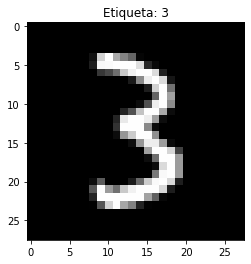

In [9]:
# Obtener un lote de imágenes y etiquetas
images, labels = next(iter(trainloader))

# Seleccionar una imagen y su etiqueta del lote
img, label = images[0], labels[0]

# Revertir la normalización y convertir el tensor a una matriz Numpy
img = img.numpy().squeeze() * 0.5 + 0.5

# Visualizar la imagen y su etiqueta
plt.imshow(img, cmap='gray')
plt.title(f'Etiqueta: {label.item()}')
plt.show()


In [3]:
import torch.nn as nn
import torch.optim as optim

# Definir la arquitectura del modelo
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x



In [4]:
class SimpleCNN_Sequential(nn.Module):
    def __init__(self):
        super(SimpleCNN_Sequential, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.classifier(x)
        return x

In [5]:
# Instanciar el modelo, la función de pérdida y el optimizador
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [6]:


# Entrenar el modelo
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

print("Entrenamiento finalizado")


Epoch 1, Loss: 1.094244761912744
Epoch 2, Loss: 0.18479266717656653
Epoch 3, Loss: 0.1288514003864547
Epoch 4, Loss: 0.10444024699563378
Epoch 5, Loss: 0.09007253175946886
Epoch 6, Loss: 0.07967290565816325
Epoch 7, Loss: 0.07139979389760254
Epoch 8, Loss: 0.06485930056636856
Epoch 9, Loss: 0.059844990149696374
Epoch 10, Loss: 0.05551659357103545
Entrenamiento finalizado
